In [2]:
from neo4j_runway import Discovery, GraphDataModeler, PyIngest, UserInput
from neo4j_runway.code_generation import PyIngestConfigGenerator
from neo4j_runway.llm.openai import OpenAIDiscoveryLLM, OpenAIDataModelingLLM

In [10]:
from dotenv import load_dotenv
import os


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [13]:
load_dotenv(dotenv_path='dot.env')
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
NEO4J_URL = os.getenv("NEO4J_URL")
NEO4J_USERNAME = os.getenv("NEO4J_USERNAME")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD")

In [7]:
from neo4j_runway.utils.data import load_local_files

data_directory = ""

data_dictionary = { 'Name': 'name of shoe.',
                    'Brand': 'brand of shoe.',
                    'Description':'description of shoe.',
                    'Other Features':'other details about the shoe.',
                    'Offset': 'the difference of the stack height of heel and forefoot. also known as heel to toe drop.',
                    'Stack Height':'the height of the heel and the height of the forefoot that is given.',
                    'Cushioning': 'the level of the cushioning of the shoe.',
                    'Foam Cushioning': 'the name of type of foam cushioning used for the shoe.'
                    }

use_cases = ["Which shoe has an offset lower than 8mm?", "Which shoes have PWRRUN PB foam cushioning?", "Which shoe have a carbon plate in other features?"]

data = load_local_files(data_directory=data_directory,
                        data_dictionary=data_dictionary,
                        general_description="This is data about shoes and their attributes.",
                        use_cases=use_cases,
                        include_files=["shoes.csv"])

In [14]:
llm_disc = OpenAIDiscoveryLLM(model_name='gpt-4o-mini-2024-07-18', model_params={"temperature": 0})
llm_dm = OpenAIDataModelingLLM(model_name='gpt-4o-2024-05-13', model_params={"temperature": 0.5})

In [16]:
disc = Discovery(llm=llm_disc, data=data)
disc.run()

disc.run(show_result=True, notebook=True)

### Preliminary Analysis of Shoe Data

#### Overall Details:
1. **Data Structure**: The dataset consists of 6 entries (shoes) and 8 attributes. All attributes are of type `object`, indicating that they are categorical or textual in nature.
2. **Non-Null Values**: There are no missing values in any of the columns, which is beneficial for analysis as it ensures completeness of the dataset.
3. **Memory Usage**: The dataset is relatively small, with a memory usage of approximately 516 bytes.

#### Feature Analysis:
1. **Name**: 6 unique shoe names, indicating a diverse selection. The most frequent name is "Endorphin Speed 4".
2. **Brand**: All shoes belong to the same brand, "Saucony", which may limit the analysis of brand diversity but simplifies brand-related queries.
3. **Description**: Each shoe has a unique description, which may provide insights into marketing and positioning but does not contribute to quantitative analysis.
4. **Other Features**: This column contains unique features for each shoe, with "Winged Nylon Plate" being the most common. This could be relevant for performance-related queries.
5. **Offset**: There are 3 unique values for offset, with the most common being "8mm" (4 occurrences). This feature is crucial for identifying shoes with specific drop characteristics.
6. **Stack Height**: 5 unique stack height values, with the most common being "39.5mm/31.5mm" (2 occurrences). This feature is important for understanding the overall height of the shoe.
7. **Cushioning**: 4 unique cushioning levels, with "3/5" being the most common (3 occurrences). This feature is significant for assessing comfort and performance.
8. **Foam Cushioning**: 5 unique types of foam cushioning, with "PWRRUN PB" being the most common (2 occurrences). This is a key feature for identifying specific cushioning technologies.

#### Use Case Insights:
- **Offset Lower than 8mm**: Since the most common offset is 8mm, it is important to check the unique values to identify any shoes with lower offsets. The dataset indicates that there are shoes with offsets lower than 8mm, but specific values need to be checked.
- **PWRRUN PB Foam Cushioning**: There are shoes that utilize "PWRRUN PB" foam cushioning, which can be identified easily from the dataset.
- **Carbon Plate in Other Features**: The presence of a carbon plate in the "Other Features" column can be checked against the unique values to identify relevant shoes.

#### Important Features:
- **Offset** and **Foam Cushioning** are particularly important for performance-related queries, as they directly impact the shoe's functionality and user experience.
- **Other Features** may provide additional insights into the shoe's design and technology, which can be relevant for specific use cases.

Overall, the dataset is well-structured for analysis, with clear attributes that can be leveraged to answer specific queries related to shoe characteristics.

### Preliminary Analysis of Shoe Data

#### Overall Data Characteristics:
1. **Data Structure:**  The dataset consists of 6 entries (shoes) and 8 attributes (features). All features are of type `object`, indicating that they are categorical or textual data.
2. **Missing Values:** There are no missing values in any of the columns, which is beneficial for analysis as it ensures completeness.
3. **Memory Usage:** The dataset is relatively small, with a memory usage of approximately 516 bytes.

#### Feature Analysis:
1. **Name:**  Each shoe has a unique name, with no duplicates. This feature is essential for identifying individual shoes.
2. **Brand:** All shoes belong to the same brand, Saucony. This limits the diversity of brand representation in the dataset but simplifies brand-related queries.
3. **Description:** Each shoe has a unique description, which may provide insights into the shoe's purpose or target audience. However, the descriptions are lengthy and may require text processing for specific queries.
4. **Other Features:** This feature contains additional details about the shoes, with unique values for each entry. It is crucial for understanding specific attributes that differentiate the shoes.
5. **Offset:** This feature indicates the heel-to-toe drop. There are 3 unique values, with the most common being 8mm (4 occurrences). This feature is important for identifying shoes with specific performance characteristics.
6. **Stack Height:** This feature has 5 unique values, indicating variability in shoe height. The most common stack height is 39.5mm/31.5mm (2 occurrences). This feature is relevant for understanding the shoe's cushioning and stability.
7. **Cushioning:** There are 4 unique cushioning levels, with the most common being 3/5 (3 occurrences). This feature is important for performance and comfort analysis.
8. **Foam Cushioning:** This feature has 5 unique values, with PWRRUN PB being the most common (2 occurrences). This is significant for identifying shoes with specific foam technologies.

#### Use Case Insights:
- **Offset Lower than 8mm:**  The shoes with an offset lower than 8mm can be identified by filtering the Offset feature. Currently, 4 shoes have an offset of 8mm, and the remaining shoes may have offsets that are lower.
- **PWRRUN PB Foam Cushioning:**  To find shoes with PWRRUN PB foam cushioning, we can filter the Foam Cushioning feature. Currently, 2 shoes have this type of foam cushioning.
- **Carbon Plate in Other Features:**  To identify shoes with a carbon plate, we can search the Other Features column for the term "carbon plate." Currently, only one shoe has a unique feature that mentions a carbon plate.

### Conclusion:
The dataset provides a comprehensive overview of shoe attributes, with unique values across most features. The most important features for analysis include Offset, Foam Cushioning, and Other Features, as they directly relate to performance and technology. The uniformity in brand representation may limit broader market analysis but allows for focused insights on Saucony shoes.

In [17]:
gdm = GraphDataModeler(llm=llm_dm, discovery=disc)

In [18]:
gdm.create_initial_model()

> Generating Nodes...
Attempts | 3  
Received Valid Nodes
Nodes
* (:Shoe)   * (:Brand) 

> Generating Data Model...
Attempts | 1  
Received Valid Data Model
Nodes
* (:Shoe)   * (:Brand) 

Relationships
* (:Shoe)-[:HAS_BRAND]->(:Brand)   


DataModel(nodes=[Node(label='Shoe', properties=[Property(name='name', type='str', column_mapping='Name', alias=None, is_unique=True, part_of_key=False), Property(name='description', type='str', column_mapping='Description', alias=None, is_unique=False, part_of_key=False), Property(name='otherFeatures', type='str', column_mapping='Other Features', alias=None, is_unique=False, part_of_key=False), Property(name='offset', type='str', column_mapping='Offset', alias=None, is_unique=False, part_of_key=False), Property(name='stackHeight', type='str', column_mapping='Stack Height', alias=None, is_unique=False, part_of_key=False), Property(name='cushioning', type='str', column_mapping='Cushioning', alias=None, is_unique=False, part_of_key=False), Property(name='foamCushioning', type='str', column_mapping='Foam Cushioning', alias=None, is_unique=False, part_of_key=False)], source_name='file'), Node(label='Brand', properties=[Property(name='brandName', type='str', column_mapping='Brand', alias=Non

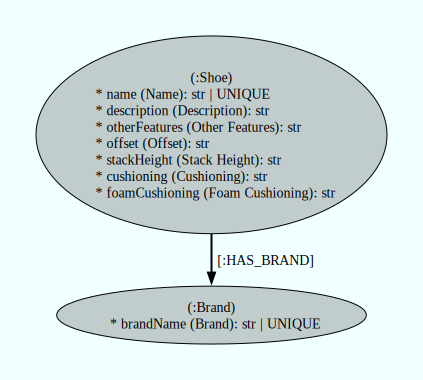

In [19]:
gdm.current_model.visualize()

> Generating Data Model...
Attempts | 2  
Received Valid Data Model
Nodes
* (:Shoe)     * (:Brand)
* (:Offset)    

Relationships
* (:Shoe)-[:HAS_BRAND]->(:Brand)     
* (:Shoe)-[:HAS_OFFSET]->(:Offset)   


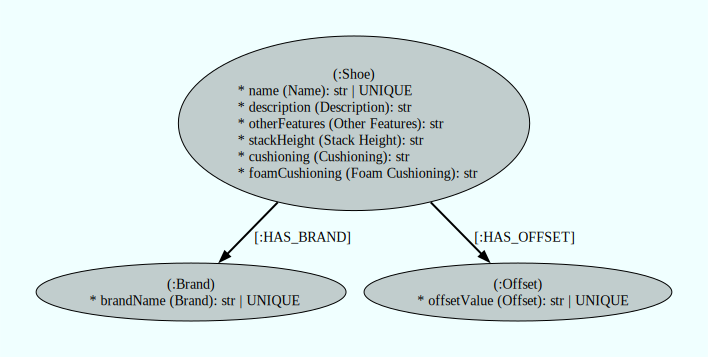

In [20]:
gdm.iterate_model(corrections="Create an Offset node with Offset property.")
gdm.current_model.visualize()

> Generating Data Model...
Attempts | 1  
Received Valid Data Model
Nodes
* (:Shoe)     * (:Brand)
* (:Offset)    

Relationships
* (:Shoe)-[:HAS_BRAND]->(:Brand)     
* (:Shoe)-[:HAS_OFFSET]->(:Offset)   


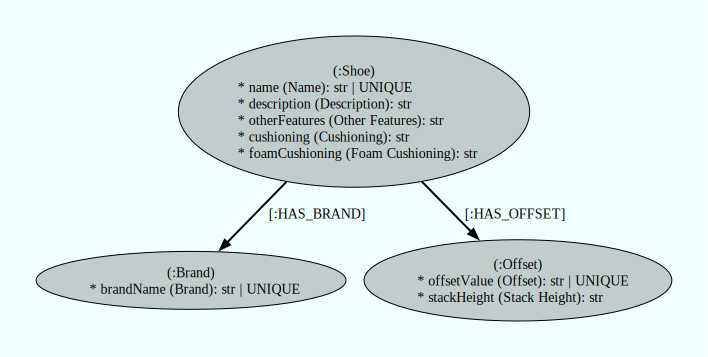

In [21]:
gdm.iterate_model(corrections="Add stack height property to Offset node.")
gdm.current_model.visualize()

> Generating Data Model...
Attempts | 1  
Received Valid Data Model
Nodes
* (:Shoe)     * (:Brand)
* (:Offset)   * (:Cushioning) 

Relationships
* (:Shoe)-[:HAS_BRAND]->(:Brand)             
* (:Shoe)-[:HAS_OFFSET]->(:Offset)           
* (:Shoe)-[:HAS_CUSHIONING]->(:Cushioning)   


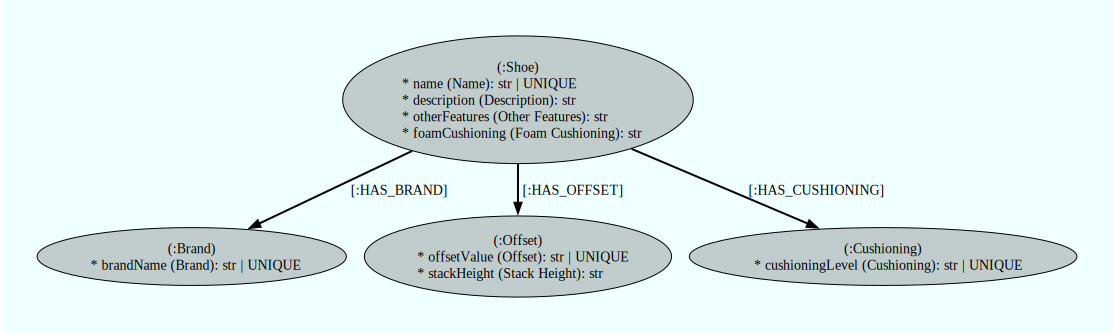

In [22]:
gdm.iterate_model(corrections="Create a Cushioning node with Cushioning property.")
gdm.current_model.visualize()

> Generating Data Model...
Attempts | 1  
Received Valid Data Model
Nodes
* (:Shoe)         * (:Brand)
* (:Offset)       * (:StackHeight)
* (:Cushioning)    

Relationships
* (:Shoe)-[:HAS_BRAND]->(:Brand)                
* (:Shoe)-[:HAS_OFFSET]->(:Offset)              
* (:Shoe)-[:HAS_STACK_HEIGHT]->(:StackHeight)   
* (:Shoe)-[:HAS_CUSHIONING]->(:Cushioning)      


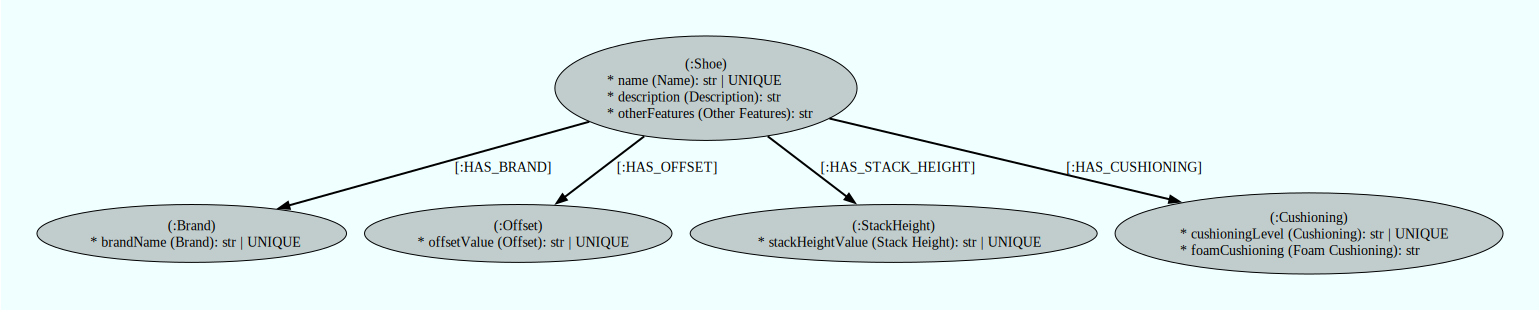

In [23]:
gdm.iterate_model(corrections="Add foam cushioning property to Cushioning node.")
gdm.current_model.visualize()

> Generating Data Model...
Attempts | 1  
Received Valid Data Model
Nodes
* (:Shoe)          * (:Offset)
* (:StackHeight)   * (:Cushioning) 

Relationships
* (:Shoe)-[:HAS_OFFSET]->(:Offset)              
* (:Shoe)-[:HAS_STACK_HEIGHT]->(:StackHeight)   
* (:Shoe)-[:HAS_CUSHIONING]->(:Cushioning)      


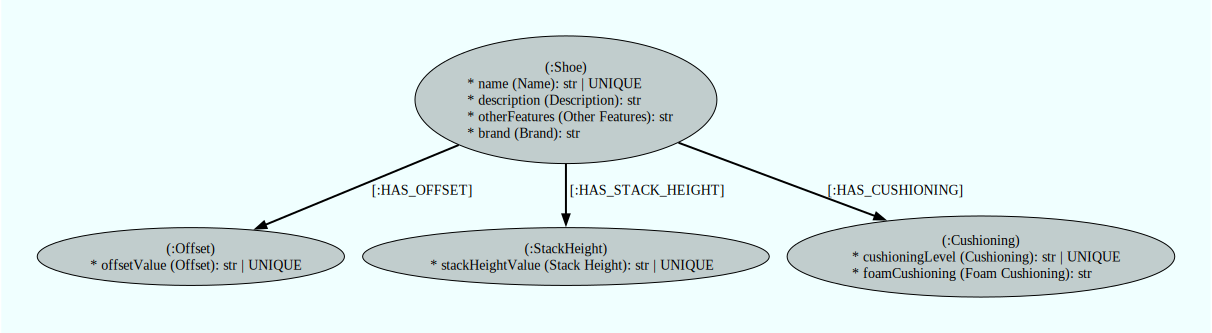

In [24]:
gdm.iterate_model(corrections="Remove Brand node and add Brand property to Shoe node.")
gdm.current_model.visualize()

> Generating Data Model...
Attempts | 1  
Received Valid Data Model
Nodes
* (:Shoe)         * (:Offset)
* (:Cushioning)    

Relationships
* (:Shoe)-[:HAS_OFFSET]->(:Offset)           
* (:Shoe)-[:HAS_CUSHIONING]->(:Cushioning)   


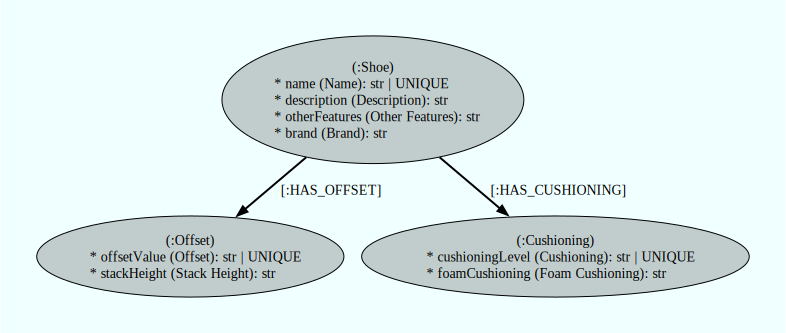

In [25]:
gdm.iterate_model(corrections="Remove stack height node and add stack height property to Offset node.")
gdm.current_model.visualize()

> Generating Data Model...
Attempts | 1  
Received Valid Data Model
Nodes
* (:Shoe)         * (:Offset)
* (:Cushioning)    

Relationships
* (:Shoe)-[:HAS_OFFSET]->(:Offset)           
* (:Shoe)-[:HAS_CUSHIONING]->(:Cushioning)   


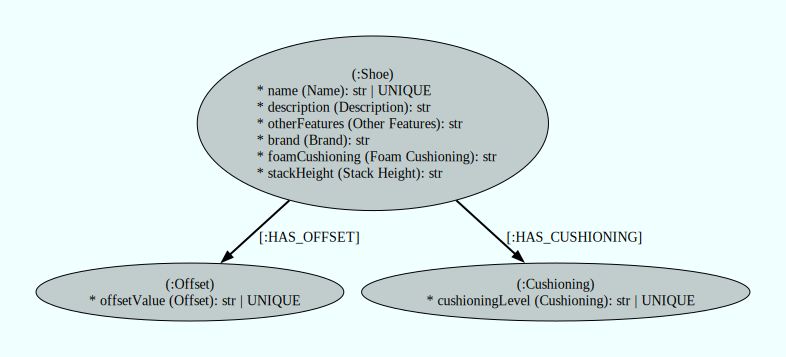

In [30]:
gdm.iterate_model(corrections="Remove stack height property from Offset node and add stack height propery to Shoe node.")
gdm.current_model.visualize()